In [4]:
library(igraph)
library(proxy)


Attaching package: ‘proxy’

The following objects are masked from ‘package:stats’:

    as.dist, dist

The following object is masked from ‘package:base’:

    as.matrix



In [196]:
G <- read_graph("embedded_polbooks.gml", "gml")

In [197]:
G

IGRAPH U--- 105 441 -- 
+ attr: id (v/n), label (v/c), embedding4 (v/n), embedding3 (v/n),
| embedding2 (v/n), embedding1 (v/n), embedding0 (v/n), value (v/c),
| connected_component (v/n)
+ edges:
 [1] 1-- 2 1-- 3 1-- 4 1-- 5 1-- 6 1-- 7 2-- 4 2-- 6 2-- 7 3-- 5 3-- 6 3-- 8
[13] 4-- 6 4-- 9 4--10 4--11 4--12 4--13 4--14 4--15 4--16 4--17 4--18 4--19
[25] 4--20 4--21 4--22 4--23 4--24 4--25 4--26 4--27 4--28 5-- 6 5-- 7 5--29
[37] 5--30 5--31 5--32 6-- 7 6-- 8 7-- 8 7--11 7--13 7--19 7--23 7--26 7--30
[49] 8--72 8--15 8--86 8--59 8--31 9--10 9--11 9--12 9--13 9--14 9--15 9--21
[61] 9--22 9--23 9--24 9--25 9--27 9--28 9--33 9--34 9--36 9--38 9--41 9--42
+ ... omitted several edges

In [198]:
true_communities <- sapply(V(G)$value, function(label){
    if (label == "c") return("red")
    else if (label == "l") return("green")
    else return("blue")    
})

In [247]:
# first and second order similarities
S1 <- 1 - as.matrix(as_adj(G))
S2 <- as.matrix(dist(S1, method = "cosine"))
S3 <- as.matrix(dist(S2, method = "cosine"))

S <- 1 * S1 + 1 * S2 + 1 * S3

In [248]:
H <- graph_from_adjacency_matrix(S, weighted = T, mode="undirected")

In [249]:
mst <- minimum.spanning.tree(H)

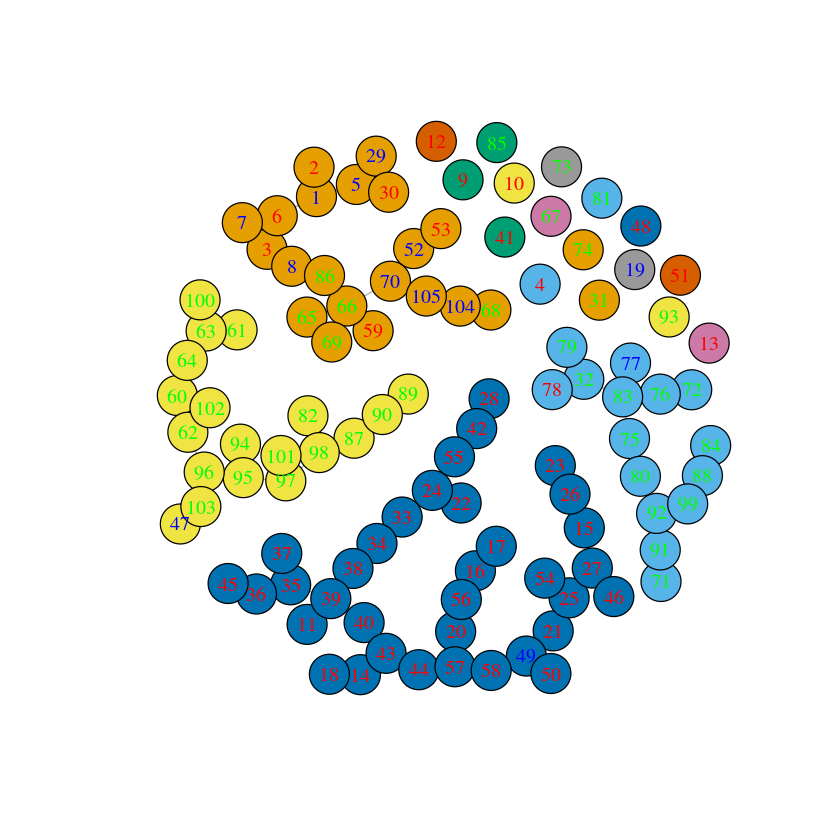

In [268]:
mst <- delete_edges(mst, E(mst)[which.max(E(mst)$weight)])

plot.igraph(mst, 
            layout=layout.fruchterman.reingold, vertex.color=components(mst)$membership,
           vertex.label.color=true_communities, vertex.color="white")

In [92]:
data.frame(nodes=1:34, club=V(G)$club, com
           =true_communities)

nodes,club,com
1,Mr. Hi,1
2,Mr. Hi,1
3,Mr. Hi,1
4,Mr. Hi,1
5,Mr. Hi,1
6,Mr. Hi,1
7,Mr. Hi,1
8,Mr. Hi,1
9,Mr. Hi,1
10,Officer,2
